# **Text Analysis**

---
---

### **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


--- 
### **Top Keywords:**

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize headlines and extract common keywords
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['headline'])
keywords = vectorizer.get_feature_names_out()

print("Top keywords:", keywords)

Top keywords: ['52' 'companies' 'eps' 'estimate' 'higher' 'hit' 'lows' 'maintains'
 'market' 'new' 'price' 'q1' 'sales' 'session' 'shares' 'stocks' 'target'
 'trading' 'week' 'yesterday']


### **Summary of Top Keywords**

- The top keywords extracted from the analyst ratings headlines—such as: 
**'stocks', 'shares', 'market', 'eps', 'sales', 'price', 'target', 'estimate', 'higher', 'new', 'week', 'session', 'trading', 'maintains', 'lows', 'hit', 'companies', 'q1', 'yesterday', '52'**—highlight the primary themes in financial news coverage. 
- These terms reflect frequent discussions around stock performance, earnings reports (EPS, sales, estimates), price targets, market movements, and notable events (such as new highs/lows or specific trading sessions). 
The prominence of these keywords indicates a strong focus on market activity, company updates, and analyst actions within the dataset.

---

### **visualizations (word clouds or frequency plots) of Top Keywords**

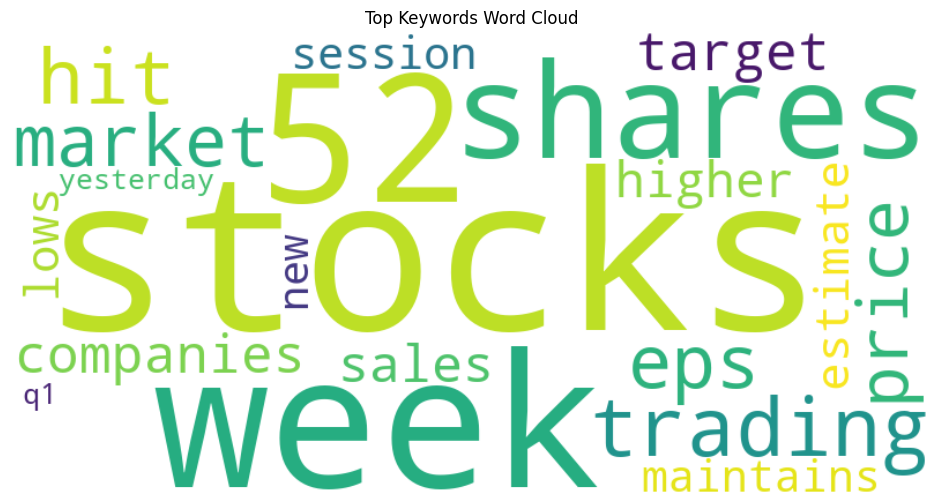

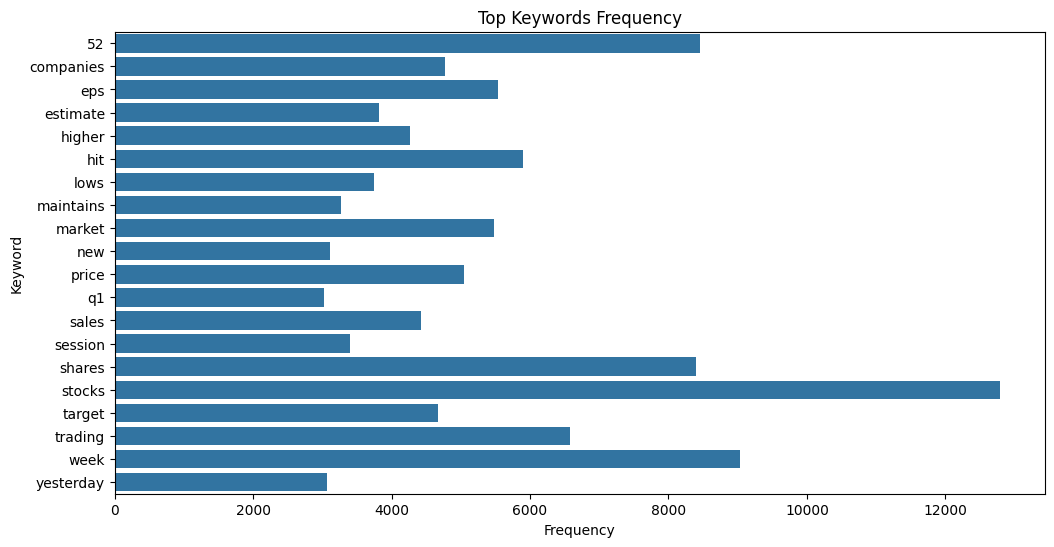

In [5]:
from wordcloud import WordCloud

# Create a frequency dictionary for the top keywords
keyword_freq = np.asarray(X.sum(axis=0)).flatten()
freq_dict = dict(zip(keywords, keyword_freq))

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords Word Cloud')
plt.show()

# Frequency bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(freq_dict.values()), y=list(freq_dict.keys()), orient='h')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top Keywords Frequency')
plt.show()